In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

In [3]:
# 采样10次，索引i处的值代表采样结果中i出现的次数
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 1., 4., 2., 2., 1.])

In [4]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1620, 0.1570, 0.1700, 0.1600, 0.1780, 0.1730])

D:\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 39564 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 20272 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 31639 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
D:\anaconda3\lib\site-packages\matplotli

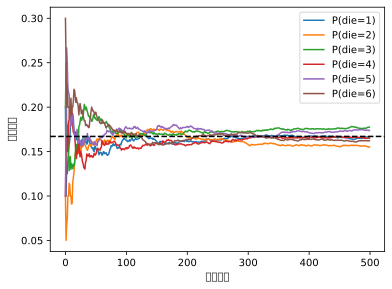

In [5]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('实验次数')
d2l.plt.gca().set_ylabel('估算概率')
d2l.plt.legend();

第二次测试能显著改善估计

期望和差异

方差来liagnh